In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })

In [3]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [4]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [7]:
LA = ca_housing[ca_housing['region_name'] == 'Los Angeles']['total_homes_sold'].sum()
SF = ca_housing[ca_housing['region_name'] == 'San Francisco']['total_homes_sold'].sum()
SD = ca_housing[ca_housing['region_name'] == 'San Diego']['total_homes_sold'].sum()

In [9]:
pd.DataFrame({
    'Los Angeles': [LA],
    'San Francisco': [SF],
    'San Diego': [SD],
})

,Los Angeles,San Francisco,San Diego
0,4622703,371776,2373289


In [10]:
#ca_housing.query("region_name in ['San Francisco','Los Angeles','San Diego']")
sales_total = ca_housing[ca_housing['region_name'].isin(['San Francisco', 'Los Angeles', 'San Diego'])].groupby('region_name').agg({'total_homes_sold':'sum'})
sales_total

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


Text(0.5, 1.0, 'Share of Home Sales Selected in CA Markets')

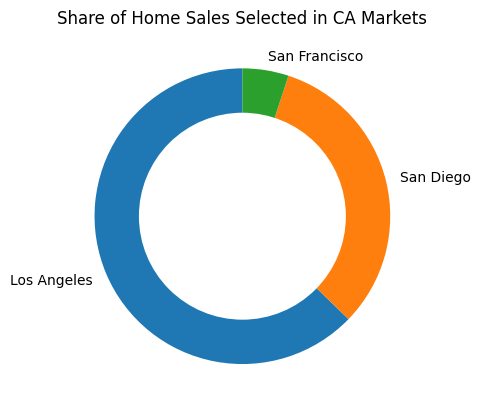

In [11]:
fig, ax = plt.subplots()

ax.pie(
    x=sales_total['total_homes_sold'],
    startangle=90,
    labels=sales_total.index,
    #explode=(0,0,.14)
)

hole = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)
ax.set_title('Share of Home Sales Selected in CA Markets')